In [66]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from scipy import stats

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

In [59]:
#mannual linear regression model
class LinearRegressionModel:
    
    def __init__(self, eta = 0.1, epochs = 10, is_verbose = False):
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []

        
    def predict(self,x):
        
        ones = np.ones((x.shape[0], 1))
        x_1 = np.append(x.copy(),ones,1)
        
        return self.get_activation(x_1)
        
    
    def get_activation(self,x):
        
        activation = np.dot(x,self.w)
        return activation

    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(),ones,1)
        
        self.w = np.random.rand(X_1.shape[1])
        #  print('Initial w:')
        #  print(w)

        # for i in range(len(X_1)):
        #     print(predict(X_1[i,],w))


        for epoch in range(self.epochs):
            
            error = 0
            
            # ***** optimised version *****
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation),X_1)
            self.w += delta_w
            #print(self.w)
            errors = np.square(y - activation).sum()/2.0
            
            self.list_of_errors.append(errors)

            if(self.is_verbose):
                print(f'Epoch: {epoch}, weigths: {self.w}, errors: {number_of_errors}')



In [60]:
wine_red = pd.read_csv(r"data/winequality/winequality-red.csv",
                   sep=';')
 
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


0.5625
0.409375


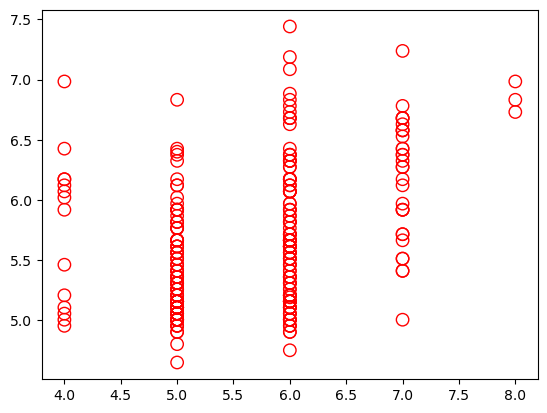

In [61]:
X = wine_red['alcohol'].values.reshape(-1,1)
y = wine_red['quality'].values

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


lr = LinearRegressionModel(eta = 0.00001, epochs = 100)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

#print(list(zip(y_test,y_pred)))

#print(np.count_nonzero(y_test-y_pred))

#plt.scatter(range(lr.epochs),lr.list_of_errors)


plt.scatter(y_test,y_pred,s=80,facecolors = "none", edgecolors = 'r')


print(np.count_nonzero(np.rint(y_pred) == y_test)/len(y_test))
print(np.count_nonzero(round(np.mean(y_test)) == y_test)/len(y_test))

0.628125


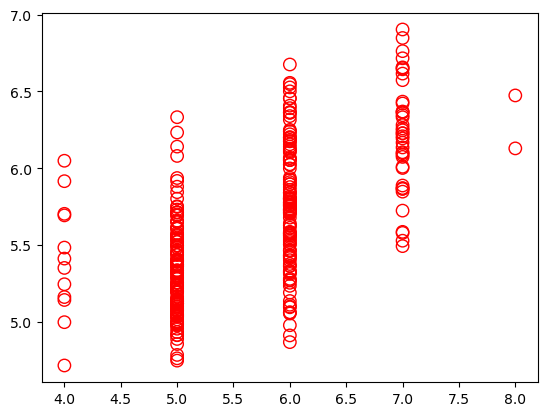

In [65]:
#cols = wine_red.columns[:-1]

X = wine_red[wine_red.columns[:-1]]
y = wine_red['quality'].astype(float)

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_test,y_pred,s=80,facecolors = "none", edgecolors = 'r')


print(np.count_nonzero(np.rint(y_pred) == y_test)/len(y_test))

In [82]:
#filtering data from outliers 

z = np.abs(stats.zscore(wine_red))

threshold = 4
#print(np.where(z > threshold))

wine_filtered_z = wine_red[(z<threshold).all(axis=1)]
wine_filtered_z


Q1 = wine_red.quantile(0.25)
Q3 = wine_red.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((wine_red < (Q1 - 1.5*IQR)) | (wine_red > (Q3 + 1.5*IQR)))
wine_filtered_iqr = wine_red[~outlier_condition.any(axis=1)]
wine_filtered_iqr

print(wine_red['quality'].unique())
print(wine_filtered_z['quality'].unique())
print(wine_filtered_iqr['quality'].unique())

[5 6 7 4 8 3]
[5 6 7 4 8 3]
[5 6 7 4]


0.5584415584415584


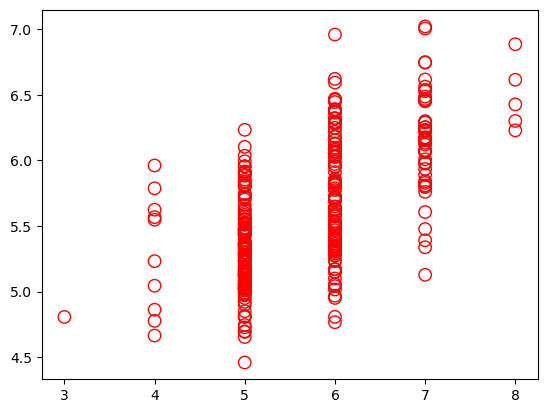

In [84]:
X = wine_filtered_z[wine_filtered_z.columns[:-1]]
y = wine_filtered_z['quality'].astype(float)

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_test,y_pred,s=80,facecolors = "none", edgecolors = 'r')


print(np.count_nonzero(np.rint(y_pred) == y_test)/len(y_test))

0.6186440677966102


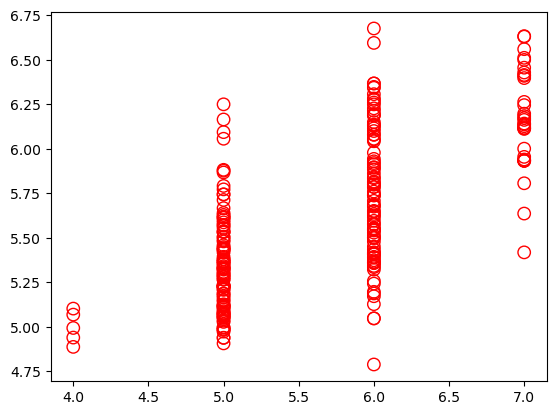

In [85]:
X = wine_filtered_iqr[wine_filtered_iqr.columns[:-1]]
y = wine_filtered_iqr['quality'].astype(float)

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_test,y_pred,s=80,facecolors = "none", edgecolors = 'r')


print(np.count_nonzero(np.rint(y_pred) == y_test)/len(y_test))